<a href="https://colab.research.google.com/github/Witcape/AI_Practice/blob/main/Resnets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Required Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.applications.resnet_v2 import ResNet50V2
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import Dense, Input, Add, Activation, ZeroPadding2D, MaxPooling2D, AveragePooling2D, Conv2D, Flatten, BatchNormalization
from tensorflow.keras.activations import relu
from tensorflow.keras.initializers import random_uniform, glorot_uniform
from tensorflow.keras.models import Model

***ResNet mainly contains, and Identity and a Convolutional Block***

### IDENTITY BLOCK
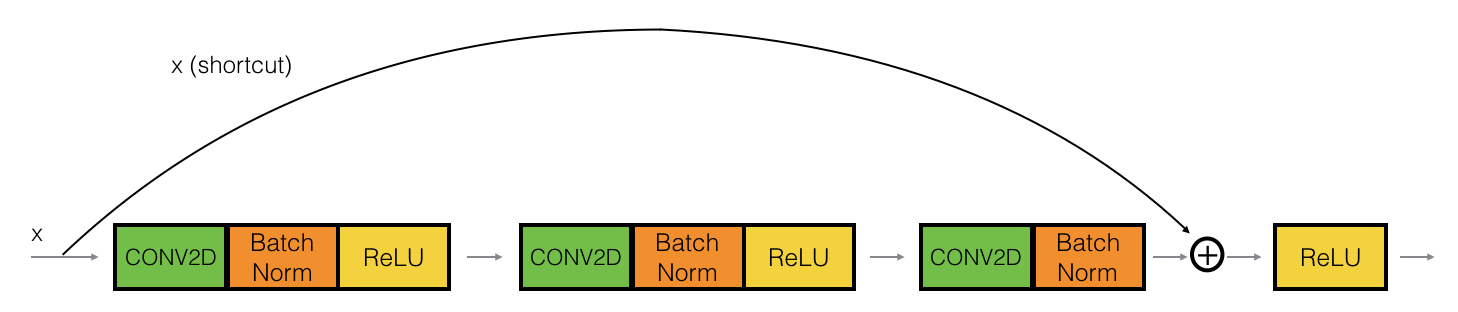

In [ ]:
def identity_block(X, f, filters, initializer = random_uniform):
  F1, F2, F3 = filters
  X_Shortcut = X

  X = Conv2D(filters = F1, kernal_size = (1,1), strides = (1,1), padding = 'valid', kernal_initializer = initializer(seed = 0))(X),
  X = BatchNormalization(axis = 3)(X),
  X = Activation('relu')(X,),

  X = Conv2D(filters = F2, kernal_size = (f,f), strides = (1,1), padding = 'same', kernal_initializer = initializer(seed = 0))(X),
  X = BatchNormalization(axis = 3)(X),
  X = Activation('relu')(X),

  X = Conv2D(filters = F3, kernal_size = (1,1), strides = (1,1), padding = 'same', kernal_initializer = initializer(seed = 0))(X),
  X = BatchNormalization(axis = 3)(X),

  X = Add()([X, X_Shortcut]),
  X = Activation('relu')(X),

### Convolutional Block
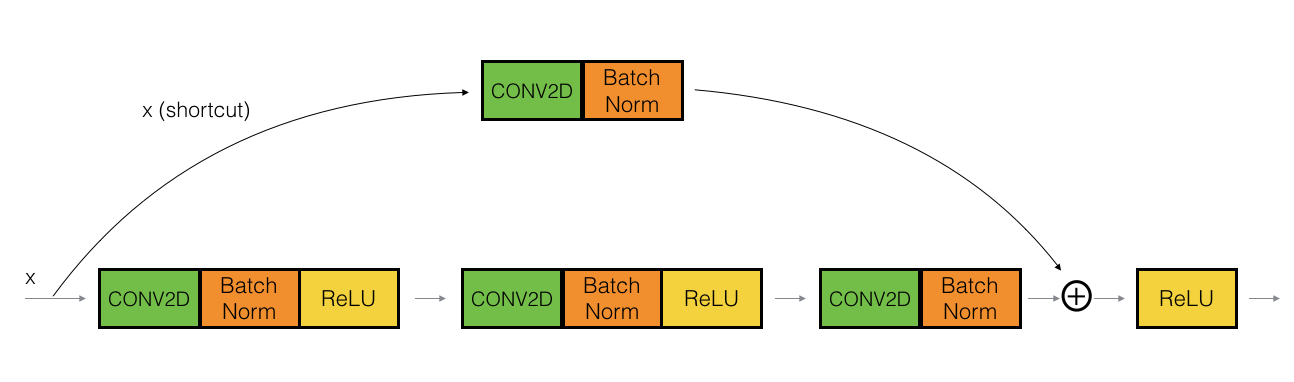

In [ ]:
def convolutional_block(X, f, filters, s = 2, initializer = glorot_uniform):
  F1, F2, F3 = filters
  X_Shortcut = X

  X = Conv2D(filters = F1, kernel_size = (1,1), strides = (s,s), padding = 'valid', kernel_initializer = initializer(seed = 0))(X),
  X = BatchNormalization(axis = 3)(X),
  X = Activation('relu')(X,),

  X = Conv2D(filters = F2, kernel_size = (f,f), strides = (1,1), padding = 'same', kernel_initializer = initializer(seed = 0))(X),
  X = BatchNormalization(axis = 3)(X),
  X = Activation('relu')(X),

  X = Conv2D(filters = F3, kernel_size = (1,1), strides = (1,1), padding = 'same', kernel_initializer = initializer(seed = 0))(X),
  X = BatchNormalization(axis = 3)(X),

  X = Conv2D(filters = F3, kernal_size = (1,1), strides = (s,s), padding = 'valid', kernel_initializer = initializer(seed = 0))(X_shortcut)
  X = BatchNormalization(axis = 3)(X_shortcut)

  X = Add()([X, X_Shortcut]),
  X = Activation('relu')(X),

### ResNet50 Architecture

In [ ]:
def ResNet50(input_shape = (64,64,3), classes = 6, training = False):
  X_input = Input(input_shape)
  X = ZeroPadding2D((3, 3))(X_input)

  X = Conv2D(64, (7, 7), strides = (2, 2), kernel_initializer = glorot_uniform(seed=0))(X)
  X = BatchNormalization(axis = 3)(X)
  X = Activation('relu')(X)
  X = MaxPooling2D((3, 3), strides=(2, 2))(X)

  X = convolutional_block(X, f = 3, filters = [64, 64, 256], s = 1)
  X = identity_block(X, 3, [64, 64, 256])
  X = identity_block(X, 3, [64, 64, 256])

  X = convolutional_block(X, f = 3, filters = [128,128,512], s = 2)
  X = identity_block(X, 3, [128,128,512])
  X = identity_block(X, 3, [128,128,512])
  X = identity_block(X, 3, [128,128,512])

  X = convolutional_block(X, f = 3, filters = [256,256,1024], s = 2)
  X = identity_block(X, 3, [256, 256, 1024])
  X = identity_block(X, 3, [256, 256, 1024])
  X = identity_block(X, 3, [256, 256, 1024])
  X = identity_block(X, 3, [256, 256, 1024])
  X = identity_block(X, 3, [256, 256, 1024])

  X = convolutional_block(X, f = 3, filters = [512,512,2048], s = 2)
  X = identity_block(X, 3, [512,512,2048])
  X = identity_block(X, 3, [512,512,2048])

  X = AveragePooling2D()(X)

  X = Flatten()(X)
  X = Dense(classes, activation='softmax', kernel_initializer = glorot_uniform(seed=0))(X)

  model = Model(inputs = X_input, outputs = X)

  return model